## Avocado Data Analysis and Machine Learning Predictions

## Table of Contents
- [Problem Statement](#0)
- [Data Preprocessing](#1)
- [Data Visualisation and Questions answered](#2)
    - Q.1 [Which type of Avocados are more in demand (Conventional or Organic)?](#2.1)
    - Q.2 [In which range Average price lies, what is distribution look like?](#2.2)
    - Q.3 [How Average price is distributed over the months for Conventional and Organic Types?](#2.3)
    - Q.4 [What are top 10 regions where Average price are very high?](#2.4)
    - Q.5 [What are top 15 regions where Average consumption is very high?](#2.5)
    - Q.6 [In which year and for which region was the Average price the highest?](#2.6)
    - Q.7 [How price is distributed over the date column?](#2.7)
    - Q.8 [How dataset features are correlated with each other?](#2.8)
- [Feature Engineering for Model building](#3)
- [Model selection/predictions](#4)
    -  [Are we good with Linear Regression? Lets find out.](#4.1)
    -  [Are we good with Decision Tree Regression? Lets find out.](#4.2)
    -  [Are we good with Random Forest Regressor? Lets find out.](#4.3)
- [Lets see final Actual Vs Predicted sample.](#5)
- [Conclusions](#6)


### * Problem Statement<a id='0'></a>

- In this notebook we will perform EDA(Exploratory Data Analysis) on the avocado dataset using pandas, seaborn, and matplotlib.
- Also, we will try to see if we can predict the Avocado’s Average Price based on different features.<br>
- This data is from Hass Avocado Board and contains data 41025 rows of data from the year 2015- 2021.The following table lists some colums and their description.

<table>
<tr><th>Features</th><th>Description</th></tr>
<tr><td>‘AveragePrice’</td><td>Average Price of Avocadoes</td></tr>
<tr><td>‘Total Volume’</td><td>Total sales volume of avocados</td></tr>
<tr><td>‘4046’</td><td>Total sales volume of  Small/Medium Hass Avocado</td></tr>
<tr><td>‘4225’</td><td>Total sales volume of Large Hass Avocado</td></tr>
<tr><td>‘4770’</td><td>Total sales volume of Extra Large Hass Avocado</td></tr>
<tr><td>‘Total Bags’</td><td>Total number of Bags sold</td></tr>
<tr><td>‘Small Bags’</td><td>Total number of Small Bags sold</td></tr>
<tr><td>‘Large Bags’</td><td>Total number of Large Bags sold</td></tr>
<tr><td>‘XLarge Bags’</td><td>Total number of XLarge Bags sold</td></tr>
<tr><td>‘type’</td><td>The type of avocado organic/conventional</td></tr>
</table><br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### * Data Preprocessing<a id='1'></a>

In [2]:
df=pd.read_csv("avocado.csv")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,01-04-2015,1.220000,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,01-04-2015,1.790000,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,01-11-2015,1.240000,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.00,conventional,2015,Albany
3,01-11-2015,1.770000,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.00,organic,2015,Albany
4,01-18-2015,1.170000,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41020,11-14-2021,1.851641,2326.92,350.66,5.44,0.00,825.69,702.84,0.00,0.00,organic,2021,Wichita
41021,11-21-2021,1.004960,80092.30,18981.16,2171.01,9.36,25695.00,22357.24,1902.73,634.68,conventional,2021,Wichita
41022,11-21-2021,1.869482,2380.46,288.29,2.17,0.00,777.66,708.36,0.00,0.00,organic,2021,Wichita
41023,11-28-2021,1.008266,70289.47,16251.89,1464.33,6.10,21416.50,18595.17,1656.51,532.21,conventional,2021,Wichita


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41025 entries, 0 to 41024
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          41025 non-null  object 
 1   AveragePrice  41025 non-null  float64
 2   Total Volume  41025 non-null  float64
 3   4046          41025 non-null  float64
 4   4225          41025 non-null  float64
 5   4770          41025 non-null  float64
 6   Total Bags    41025 non-null  float64
 7   Small Bags    41025 non-null  float64
 8   Large Bags    41025 non-null  float64
 9   XLarge Bags   41025 non-null  float64
 10  type          41025 non-null  object 
 11  year          41025 non-null  int64  
 12  region        41025 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.shape

(41025, 13)

In [5]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
#Date is object type change it to date type
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [7]:
df.sample(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
4544,2020-01-19,1.062818,198819.92,9645.09,68181.09,258.16,116632.19,0.00,0.00,0.00,conventional,2020,BuffaloRochester,1,19
27088,2017-09-10,1.870000,384536.99,103658.38,106229.71,16044.05,158604.85,85879.75,71546.81,1178.29,conventional,2017,Portland,9,10
27542,2018-02-18,1.650915,58067.43,2945.52,46388.88,213.32,8138.56,0.00,0.00,0.00,conventional,2018,Providence,2,18
21126,2015-11-29,1.160000,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,2015,NewYork,11,29
40629,2018-02-18,1.023446,83177.15,37806.38,4191.54,466.33,19196.04,0.00,0.00,0.00,conventional,2018,Wichita,2,18
11946,2021-10-17,1.175524,3472236.38,904473.49,398865.60,122650.71,811042.05,712470.79,62751.35,10868.54,conventional,2021,GreatLakes,10,17
37262,2021-05-02,1.186924,97548.58,10457.70,42839.83,539.61,39021.36,36824.32,2009.70,66.15,conventional,2021,Syracuse,5,2
23527,2018-02-25,1.854036,3885.32,97.72,716.58,0.00,1857.42,0.00,0.00,0.00,organic,2018,PeoriaSpringfield,2,25
40170,2017-08-20,2.430000,10788.29,1665.31,3993.41,0.00,5129.57,5010.27,119.30,0.00,organic,2017,WestTexNewMexico,8,20
21801,2019-05-12,1.936472,234764.09,20049.67,34130.07,52.24,174122.48,0.00,0.00,0.00,organic,2019,Northeast,5,12


In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,41025.000000,4.102500e+04,4.102500e+04,4.102500e+04,4.102500e+04,4.102500e+04,4.102500e+04,4.102500e+04,41025.000000,41025.000000,41025.000000,41025.000000
mean,1.423629,8.642940e+05,2.749467e+05,2.345652e+05,1.836267e+04,2.105351e+05,1.039222e+05,2.331316e+04,2731.811796,2018.039025,6.461182,15.724778
std,0.394518,3.535861e+06,1.204237e+06,1.004236e+06,8.902499e+04,8.522421e+05,5.692608e+05,1.496622e+05,22589.096454,1.976821,3.417474,8.793647
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.113394,1.488866e+04,5.887900e+02,2.019520e+03,0.000000e+00,7.096130e+03,0.000000e+00,0.000000e+00,0.000000,2016.000000,4.000000,8.000000
50%,1.393412,1.174475e+05,1.052854e+04,1.810527e+04,1.171100e+02,3.492300e+04,6.945800e+02,0.000000e+00,0.000000,2018.000000,6.000000,16.000000
75%,1.690000,4.450730e+05,1.131644e+05,9.853965e+04,3.801090e+03,1.047044e+05,3.795298e+04,2.814920e+03,0.000000,2020.000000,9.000000,23.000000
max,3.250000,6.103446e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.629830e+07,1.256716e+07,4.324231e+06,679586.800000,2021.000000,12.000000,31.000000


#### EDA

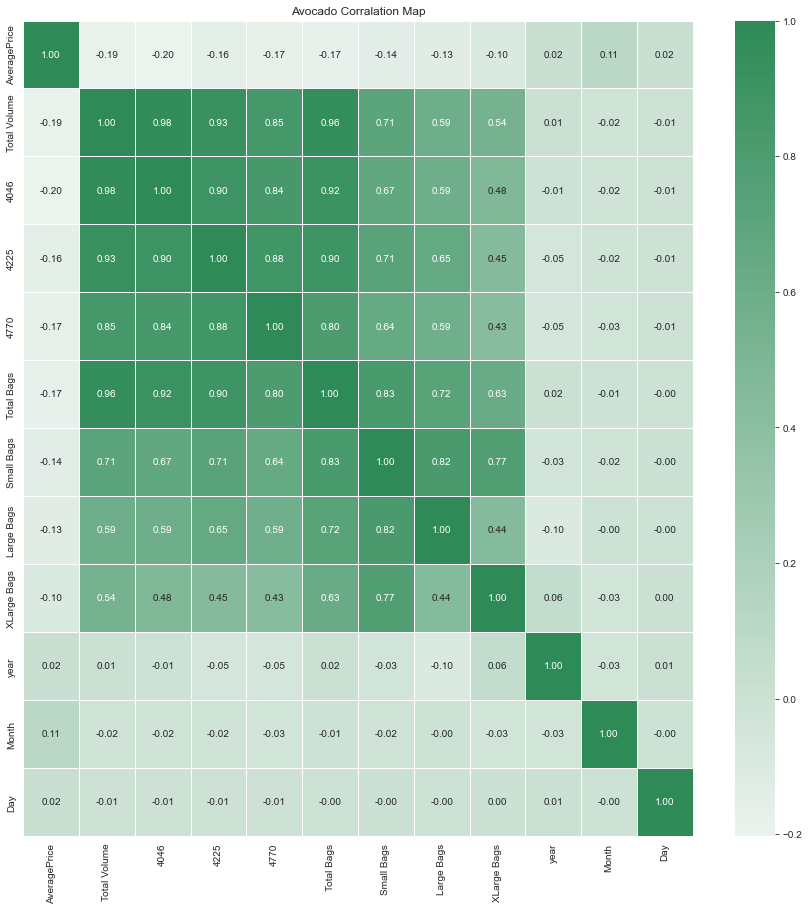

In [9]:
sns.set_style('whitegrid')
h= sns.light_palette("seagreen", as_cmap=True)
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr() ,cmap=h, annot=True ,linewidths=.5,fmt=".2f")
plt.title("Avocado Corralation Map")
plt.show()

#### Q.1 Which type of Avocados are more in demand (Conventional or Organic)?<a id='2.1'></a>

In [10]:
df_type= df.groupby('type')['Total Volume'].agg('sum').reset_index()
df_type

,type,Total Volume
0,conventional,3.421729e+10
1,organic,1.240370e+09


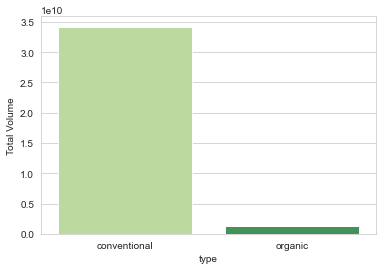

In [11]:
sns.barplot(x='type', y='Total Volume', data= df_type, palette='YlGn')
plt.show()

 Conclusion : Conventional type Avocados overall sale is more than organic.

#### Q.2 In which range Average price lies, what is distribution look like?<a id='2.2'></a>

C:\Users\farha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice'>

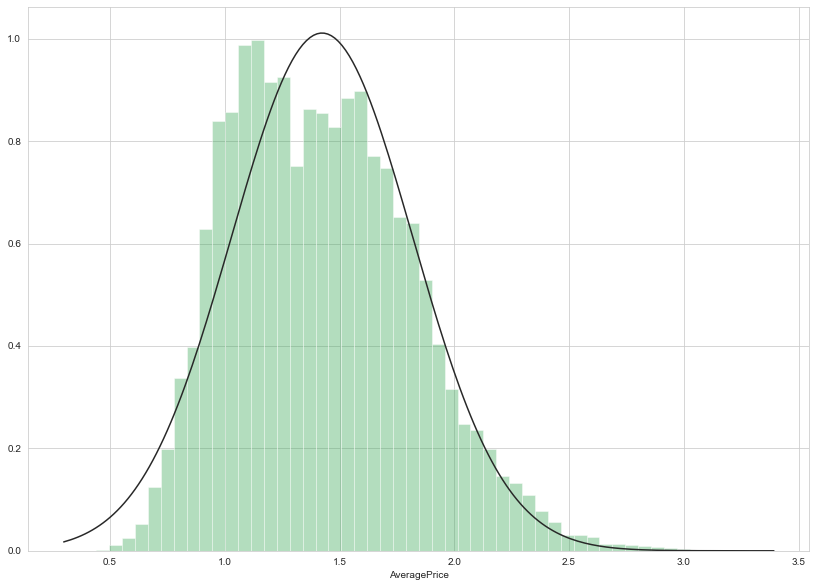

In [12]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(14, 10))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm, color='#41ab5d')

 Conclusion: Average Price distribution shows that for most cases price of avocado is between 1.1 and 1.4.


#### Q.3 How Average price is distributed over the years for Conventional and Organic Types?<a id='2.3'></a>

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

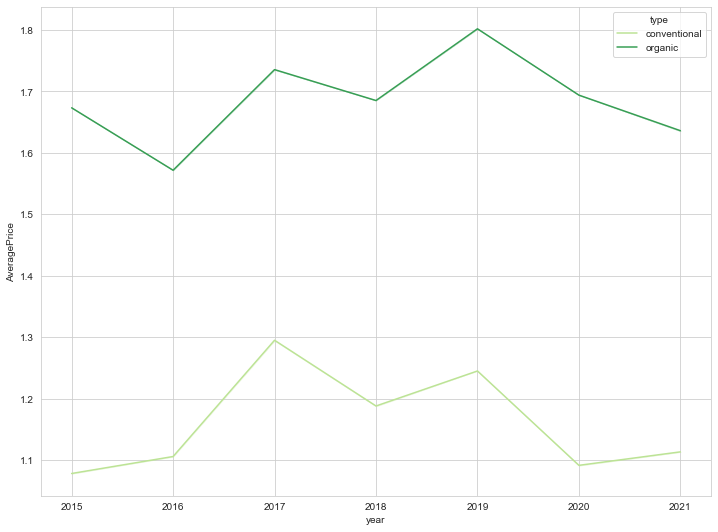

In [13]:
plt.figure(figsize=(12,9))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df, palette='YlGn', ci=0)


#### Q.4 What are top 10 regions where Average price are very high?<a id='2.4'></a>

In [14]:
df_region= df.groupby('region')['AveragePrice'].agg('mean').reset_index().sort_values(by=['AveragePrice'],ascending=False)

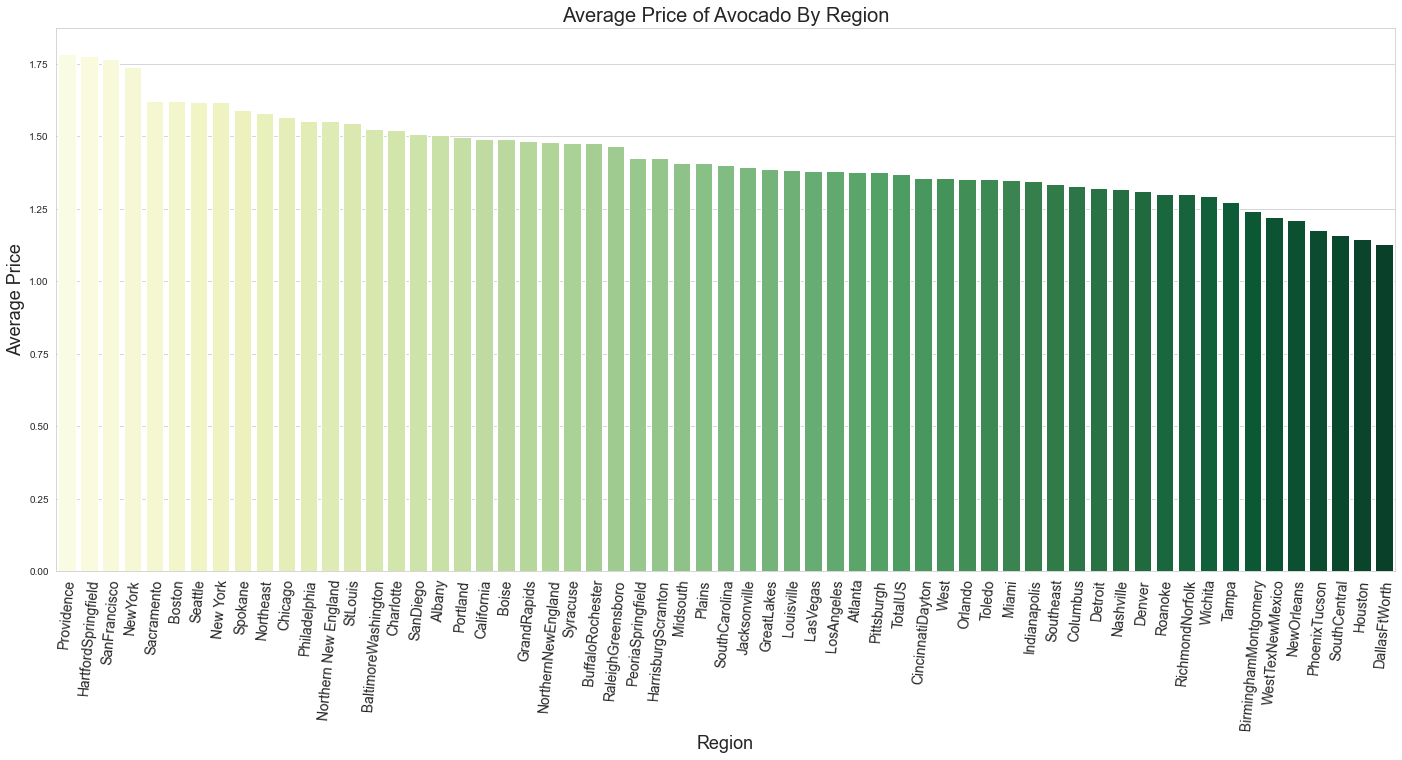

In [15]:
plt.figure(figsize=(24,10))
sns.barplot(x='region', y='AveragePrice', data= df_region, palette='YlGn' )
plt.xticks(rotation=85,  fontsize=14)
plt.xlabel('Region',font='Arial', fontsize=18)
plt.ylabel('Average Price',font='Arial', fontsize=18)
plt.title('Average Price of Avocado By Region', fontsize=20)
plt.show()


#### Q.5 What are top 15 regions where Average consumption is very high?<a id='2.5'></a>

In [16]:
df_region_vol= df.groupby('region')['Total Volume'].agg('sum').reset_index().sort_values(by=['Total Volume'],ascending=False)
df_region_vol.drop(df_region_vol[(df_region_vol['region'] =='TotalUS')].index, inplace=True)

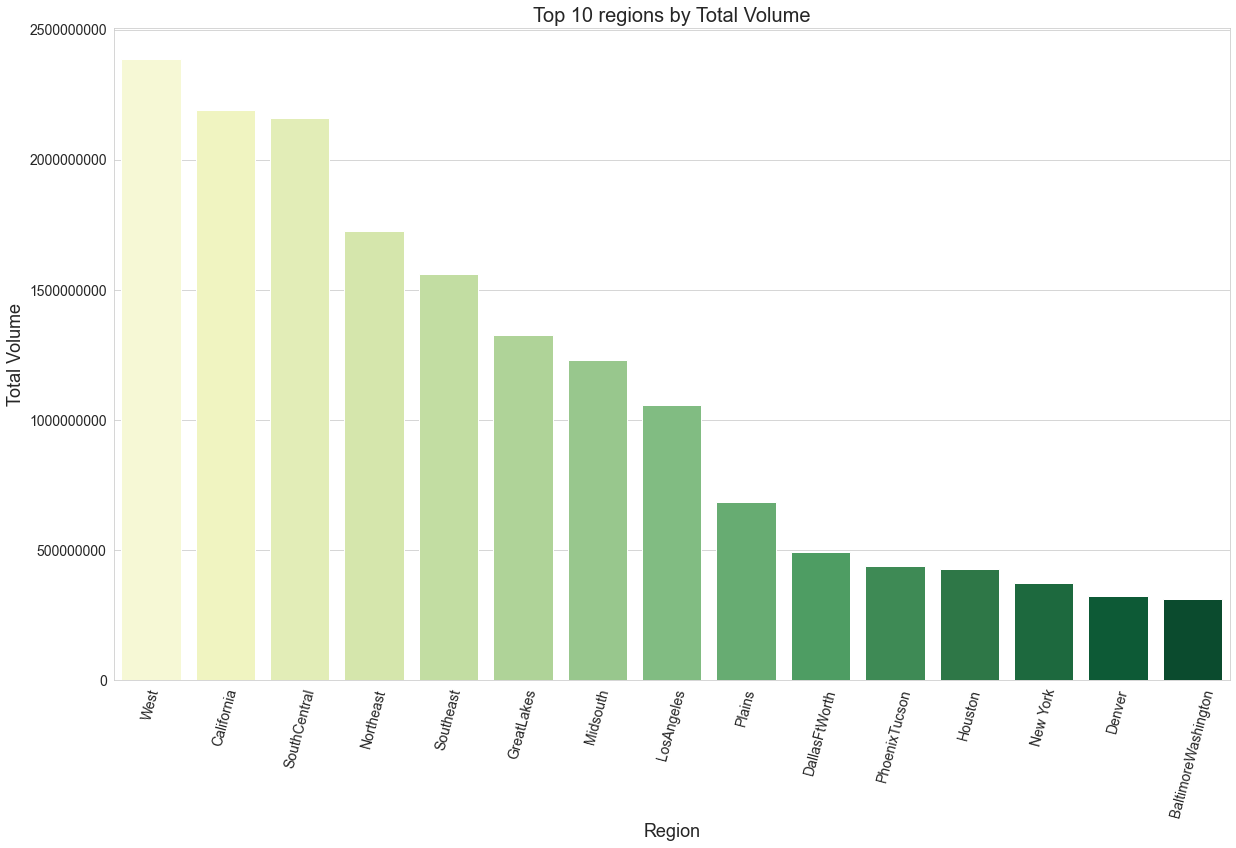

In [17]:
plt.figure(figsize=(20,12))
sns.barplot(x='region', y='Total Volume', data= df_region_vol.head(15), palette='YlGn')
plt.xticks(rotation=75,  fontsize=14)
plt.yticks(fontsize=14)
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel('Region',font='Arial', fontsize=18)
plt.ylabel('Total Volume',font='Arial', fontsize=18)
plt.title('Top 10 regions by Total Volume',fontsize=20)
plt.show()

#### Q.6 In which year and for which region was the Average price the highest?<a id='2.6'></a>

C:\Users\farha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\farha\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


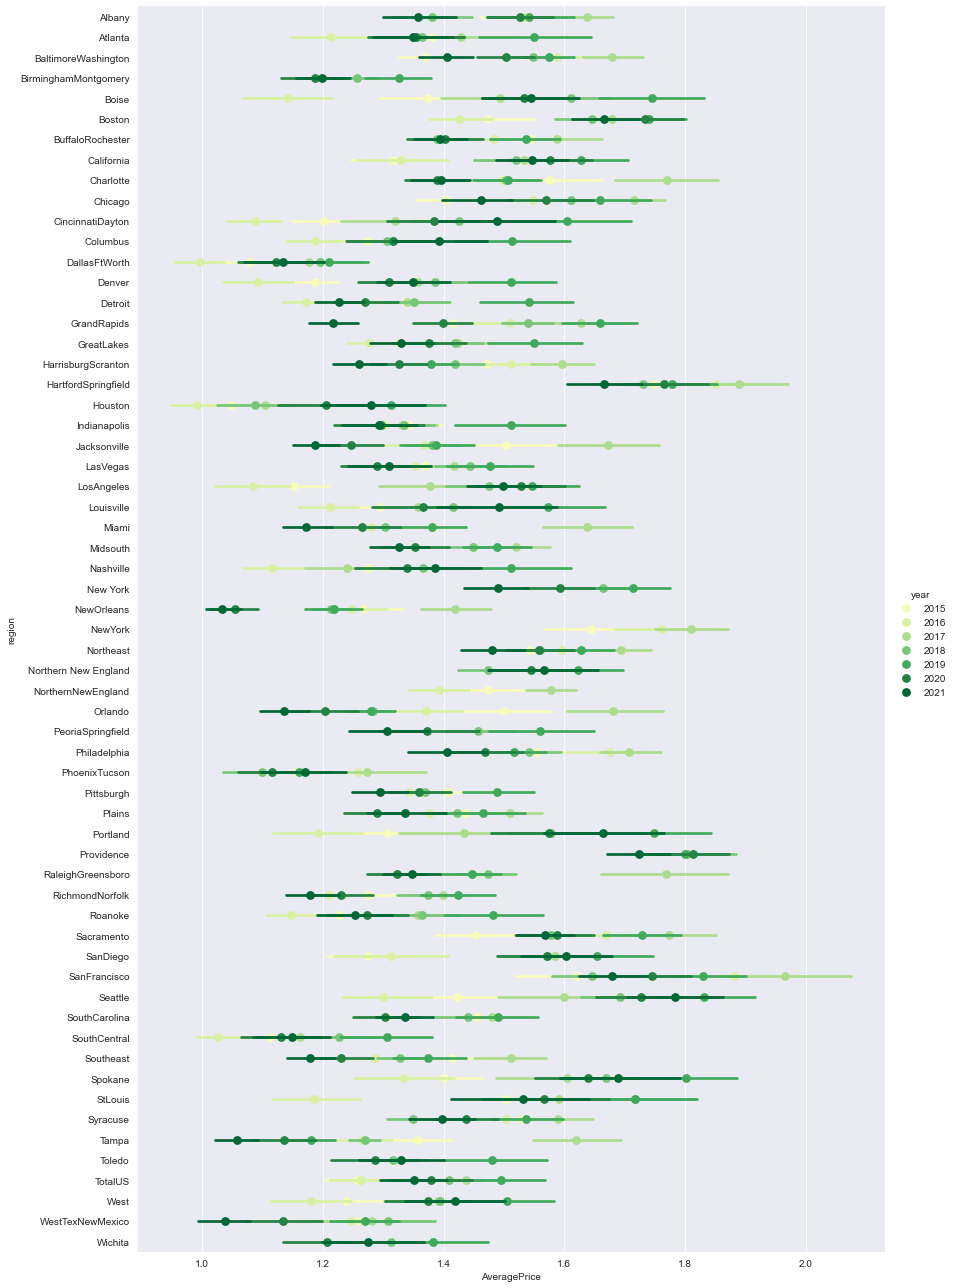

In [18]:
sns.set_style('darkgrid')
sns.factorplot(x='AveragePrice',y='region', data=df, hue='year',  aspect=0.7, palette='YlGn',size=18, join=False)           

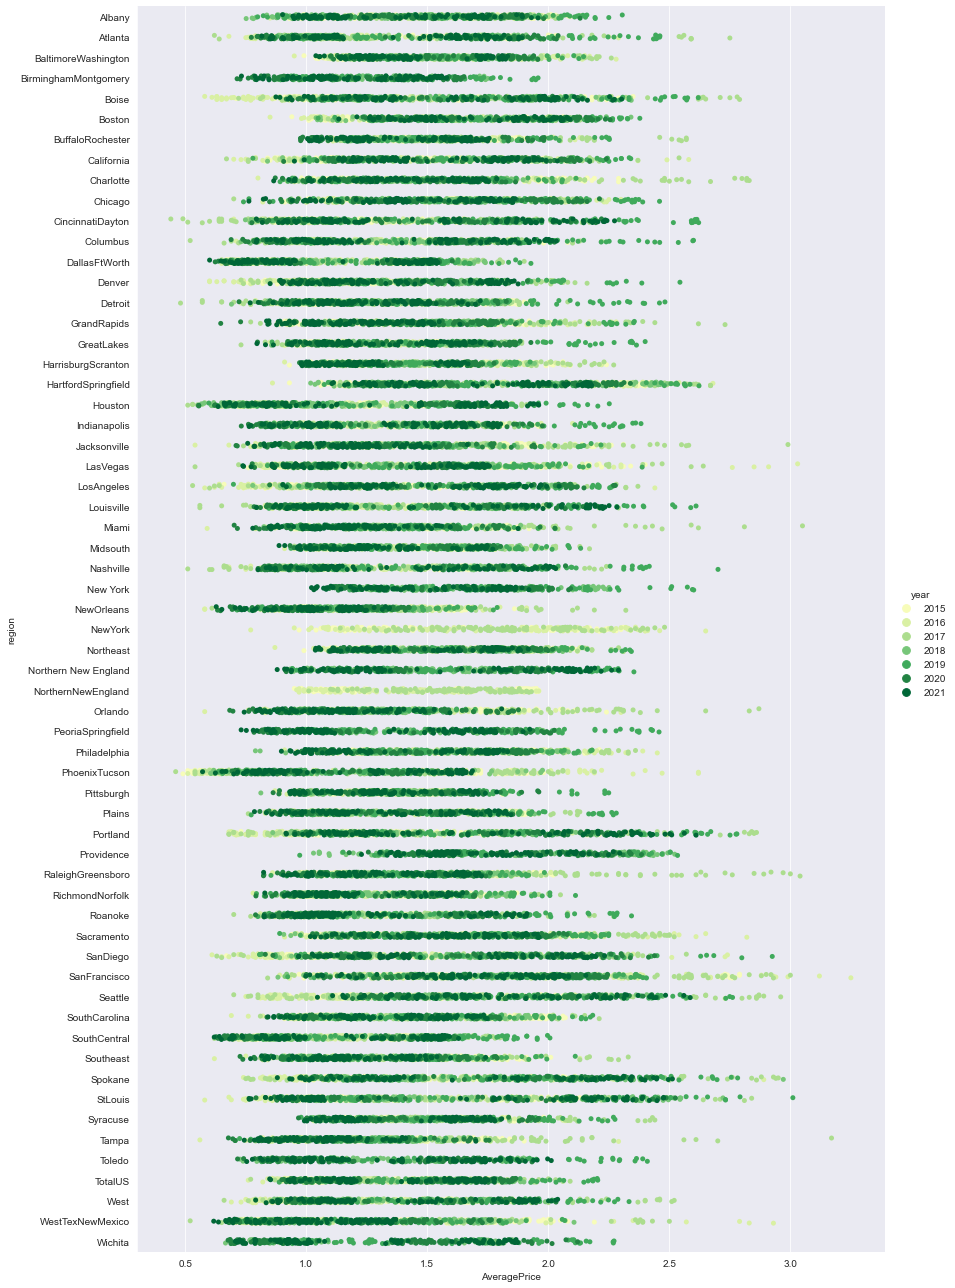

In [19]:
sns.catplot(x='AveragePrice',y='region', data=df, hue='year',  aspect=0.7, palette='YlGn',height=18)                

Conclusion: Average Price was the highest in the year 2017 for San Francisco region

In [20]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1,4
2,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,1,11
3,2015-01-11,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,1,11
4,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,1,18


In [21]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [22]:
df_melted= df.melt(id_vars=['Date', 'AveragePrice', 'Total Volume',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'], value_vars= [ '4046', '4225', '4770'],var_name='Avocado Type', value_name='Volume Sold')

In [23]:
df_melted

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day,Avocado Type,Volume Sold
0,2015-01-04,1.220000,40873.28,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,1,4,4046,2819.50
1,2015-01-04,1.790000,1373.95,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1,4,4046,57.42
2,2015-01-11,1.240000,41195.08,8424.77,8036.04,388.73,0.00,conventional,2015,Albany,1,11,4046,1002.85
3,2015-01-11,1.770000,1182.56,838.44,838.44,0.00,0.00,organic,2015,Albany,1,11,4046,39.00
4,2015-01-18,1.170000,44511.28,11921.05,11651.09,269.96,0.00,conventional,2015,Albany,1,18,4046,914.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123070,2021-11-14,1.851641,2326.92,825.69,702.84,0.00,0.00,organic,2021,Wichita,11,14,4770,0.00
123071,2021-11-21,1.004960,80092.30,25695.00,22357.24,1902.73,634.68,conventional,2021,Wichita,11,21,4770,9.36
123072,2021-11-21,1.869482,2380.46,777.66,708.36,0.00,0.00,organic,2021,Wichita,11,21,4770,0.00
123073,2021-11-28,1.008266,70289.47,21416.50,18595.17,1656.51,532.21,conventional,2021,Wichita,11,28,4770,6.10


In [24]:
df_melted.rename(columns={'Avocado Type' : 'Avocado_PLU_code'},inplace=True)

In [25]:
df_melted1= df_melted.melt(id_vars=['Date', 'AveragePrice', 'Total Volume',
       'Total Bags', 'type', 'year','Avocado_PLU_code', 'Volume Sold',
       'region', 'Month', 'Day'], value_vars= ['Small Bags', 'Large Bags', 'XLarge Bags' ],var_name='BagType', value_name='BagsSold')

In [26]:
df_melted1

,Date,AveragePrice,Total Volume,Total Bags,type,year,Avocado_PLU_code,Volume Sold,region,Month,Day,BagType,BagsSold
0,2015-01-04,1.220000,40873.28,9716.46,conventional,2015,4046,2819.50,Albany,1,4,Small Bags,9186.93
1,2015-01-04,1.790000,1373.95,1162.65,organic,2015,4046,57.42,Albany,1,4,Small Bags,1162.65
2,2015-01-11,1.240000,41195.08,8424.77,conventional,2015,4046,1002.85,Albany,1,11,Small Bags,8036.04
3,2015-01-11,1.770000,1182.56,838.44,organic,2015,4046,39.00,Albany,1,11,Small Bags,838.44
4,2015-01-18,1.170000,44511.28,11921.05,conventional,2015,4046,914.14,Albany,1,18,Small Bags,11651.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369220,2021-11-14,1.851641,2326.92,825.69,organic,2021,4770,0.00,Wichita,11,14,XLarge Bags,0.00
369221,2021-11-21,1.004960,80092.30,25695.00,conventional,2021,4770,9.36,Wichita,11,21,XLarge Bags,634.68
369222,2021-11-21,1.869482,2380.46,777.66,organic,2021,4770,0.00,Wichita,11,21,XLarge Bags,0.00
369223,2021-11-28,1.008266,70289.47,21416.50,conventional,2021,4770,6.10,Wichita,11,28,XLarge Bags,532.21


#### Q7. Which is the most popular Avocado variety ?<a id='2.7'></a>

<AxesSubplot:xlabel='year', ylabel='Volume Sold'>

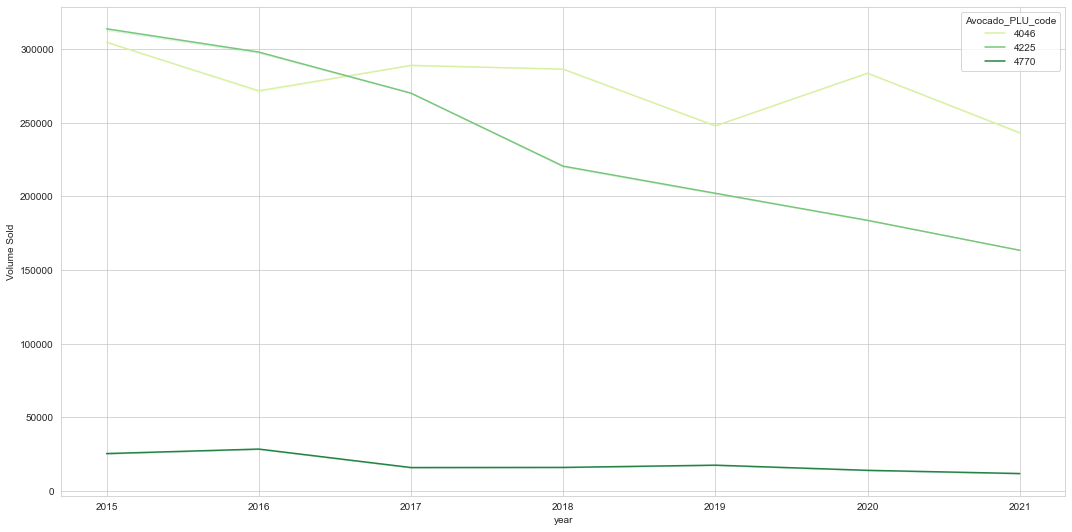

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,9))
sns.lineplot(data=df_melted, x='year', y='Volume Sold', hue='Avocado_PLU_code', palette='YlGn', ci=0)

<AxesSubplot:xlabel='Avocado_PLU_code', ylabel='Volume Sold'>

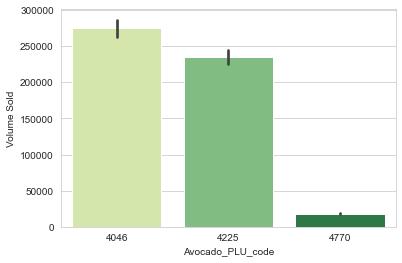

In [28]:
sns.barplot(data=df_melted, x='Avocado_PLU_code', y= 'Volume Sold',  palette='YlGn')

Conclusion: The plu 4046 avocado type overall remained the most popular Avocado variety.


#### Q8. Which is the most preferred Bagtype sold?<a id='2.8'></a>

<AxesSubplot:xlabel='AveragePrice', ylabel='BagsSold'>

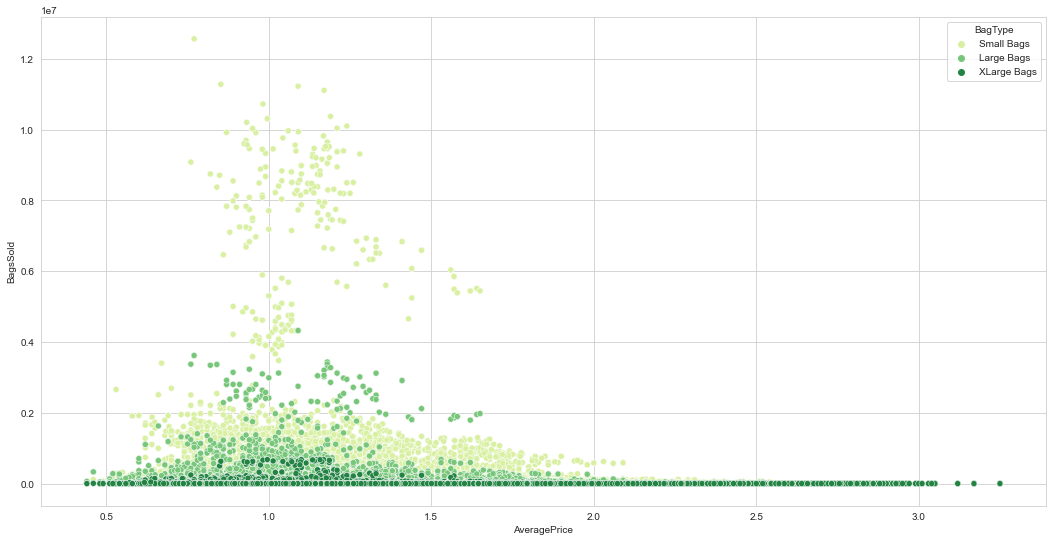

In [29]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=df_melted1, x='AveragePrice', y= 'BagsSold', hue='BagType' , palette='YlGn')

Conclusion: The Small Bag is the most preferred bagtype, followed by Large Bag.


#### Q9. How is the price distributed over the date column?<a id='2.9'></a>

In [30]:
df2 = df[['Date', 'AveragePrice']]
df2 = df2.set_index('Date')

weekly_df = df2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


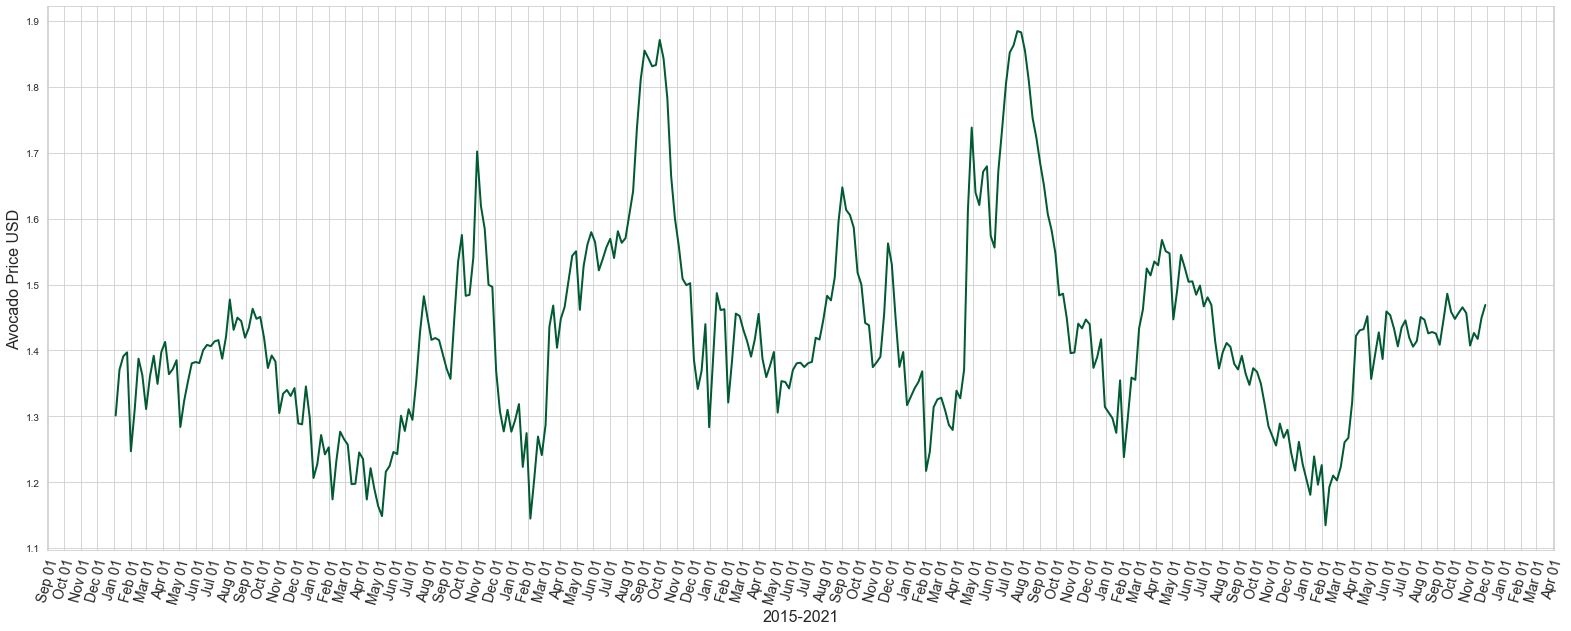

In [31]:
import matplotlib.dates as mdates

fig = plt.figure(figsize = (27, 10))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(w_df['Date'],w_df['AveragePrice'],color='#005a32', linewidth=2)
plt.xlabel("2015-2021", fontsize=16)
plt.xticks(rotation=75,  fontsize=14)
plt.ylabel("Avocado Price USD", fontsize=16)
plt.show()

In [32]:
df['region'].nunique()

61

- As we can see we have __54 regions__ and __2 unique types__, so it's going to be easy to to transform the __type feature__ to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

- I will drop the Date Feature as well because I already have __3 other columns for the Year, Month and Day__.

In [33]:
df['type'].nunique()

2

In [34]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,1,4,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,2015,1,4,1
2,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,2015,1,11,0
3,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,2015,1,11,1
4,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,2015,1,18,0


#### * Model selection/predictions

In [35]:
#Test train split
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Are we good with Linear Regression? Lets find out. 

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.22198298134510466
MSE: 0.08299842899430279
RMSE: 0.2880944792846659


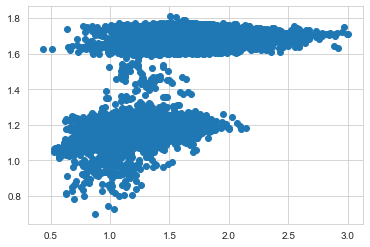

In [38]:
plt.scatter(x=y_test,y=pred)

 #### Are we good with Decision Tree Regression? Lets find out.

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

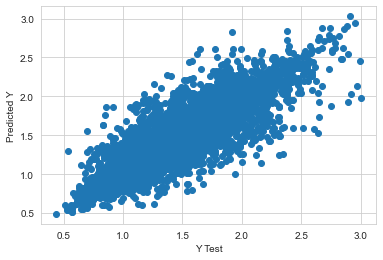

In [40]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12394522197404022
MSE: 0.035236415657510144
RMSE: 0.18771365335933918


#### Are we good with Random Forest Regressor? Lets find out.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
sns.distplot((y_test-pred),bins=50)

- Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.